# Attmpt 1

In [4]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array
from tensorflow.keras.preprocessing import image
import cv2
import os
import numpy as np
import pandas as pd

from tensorflow.keras import layers, models
from tensorflow.keras.applications.vgg19 import (preprocess_input, decode_predictions)
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score, accuracy_score, confusion_matrix
from PIL import Image

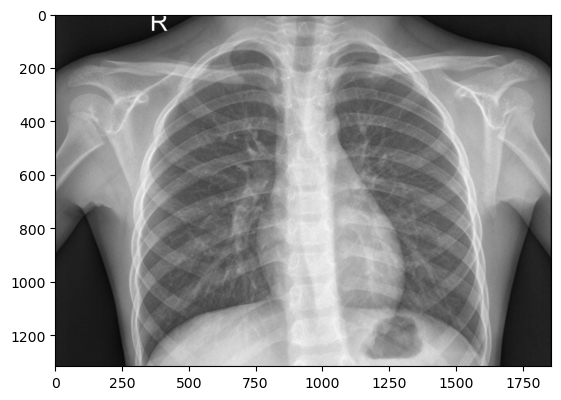

In [5]:
img = image.load_img('/Users/NicoleAnderson/Documents/GitHub/ML_pneumonia_identification/Resources/test/NORMAL/IM-0001-0001.jpeg')
plt.imshow(img)

In [6]:
cv2.imread('/Users/NicoleAnderson/Documents/GitHub/ML_pneumonia_identification/Resources/test/NORMAL/IM-0001-0001.jpeg').shape

(1317, 1857, 3)

In [7]:
base_dir = '/Users/NicoleAnderson/Documents/GitHub/ML_pneumonia_identification/Resources'
train_dir = base_dir + '/train/'
test_dir = base_dir + '/test/' 
val_dir = base_dir + '/val/' 

train = ImageDataGenerator(rescale = 1/255, rotation_range = 40, shear_range = 0.2, zoom_range = 0.2, width_shift_range = 0.2, height_shift_range = 0.2, horizontal_flip = True, fill_mode = 'nearest')
test = ImageDataGenerator(rescale = 1/255)
validation = ImageDataGenerator(rescale = 1/255)

In [8]:
train_dataset = train.flow_from_directory(train_dir, target_size = (200,200), batch_size = 32, class_mode = 'binary', shuffle=True)
test_dataset = test.flow_from_directory(test_dir, target_size = (200,200), batch_size = 32, class_mode = 'binary')
val_dataset = validation.flow_from_directory(val_dir, target_size = (200,200), batch_size = 32, class_mode = 'binary')

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [9]:
# all_train_images = []
# all_train_labels = []

# for i in range(len(train_dataset)):
#     batch_images, batch_labels = next(train_dataset)
#     all_train_images.append(batch_images)
#     all_train_labels.append(batch_labels)

# all_train_images = np.concatenate(all_train_images)
# all_train_labels = np.concatenate(all_train_labels)

# sample = 1000
# random_indices = np.random.choice(len(all_train_images), sample, replace=False)
# train_images_subset = all_train_images[random_indices]
# train_labels_subset = all_train_labels[random_indices]

# subset_datagen = ImageDataGenerator(rescale=1/255)

# train_subset_dataset = subset_datagen.flow(train_images_subset, train_labels_subset, batch_size=32)

In [10]:
def label_picture(dir):
    
    X = []
    y = []
    imglist = []

    for folder in os.listdir(dir):
        folder_path = os.path.join(dir, folder)
        if not os.path.isdir(folder_path):
            continue
        if folder == "NORMAL":
            label = 0
        else:
            label = 1

        for file in os.listdir(folder_path):
            file_path = os.path.join(folder_path, file)
            img_file = cv2.imread(file_path)              
                

            if img_file is not None:
                img = cv2.resize(img_file,(64,64))
                img_arr = img_to_array(img)/255
                X.append(img_arr)
                y.append(label)
                imglist.append(folder + '/' + file)
                                        
    X = np.asarray(X)
    y = np.asarray(y)
    
    return X, y, imglist


In [11]:
X_train, y_train, img_train = label_picture(train_dir)
X_val, y_val, img_val = label_picture(val_dir)
X_test, y_test, img_test = label_picture(test_dir)

In [12]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation ='relu', input_shape = (200, 200, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation ='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation ='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation ='relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.summary()

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 198, 198, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 99, 99, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 97, 97, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 48, 48, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 46, 46, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 135424)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │     8,667,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,695,905 (33.17 MB)

 Trainable params: 8,695,905 (33.17 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
model.compile(loss = 'binary_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [14]:
model_fit = model.fit(train_dataset, 
                      steps_per_epoch = 5216 // 32,
                      epochs = 2, 
                      validation_data= test_dataset,
                      validation_steps = 624 // 32)

Epoch 1/2


/opt/anaconda3/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


163/163 ━━━━━━━━━━━━━━━━━━━━ 227s 1s/step - accuracy: 0.7410 - loss: 0.8890 - val_accuracy: 0.6398 - val_loss: 0.6988
Epoch 2/2


2024-05-30 20:05:38.084621: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
/opt/anaconda3/lib/python3.11/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)
2024-05-30 20:05:38.267058: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.5625 - val_loss: 0.6654


In [15]:
model.save('Pneumonia_Identifier.h5')

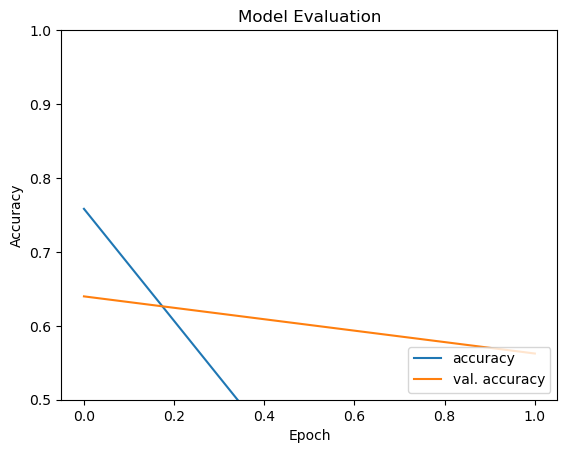

In [16]:
plt.plot(model_fit.history['accuracy'], label='accuracy')
plt.plot(model_fit.history['val_accuracy'], label = 'val. accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.title('Model Evaluation')
plt.legend(loc='lower right')

In [17]:
y_test = test_dataset.classes

yhat_test = model.predict(test_dataset)
yhat_test_binary = (yhat_test > 0.5).astype(int).flatten()

20/20 ━━━━━━━━━━━━━━━━━━━━ 9s 457ms/step


In [18]:
cm = confusion_matrix(y_test, yhat_test_binary)
print(cm)

[[ 23 211]
 [ 39 351]]


In [19]:
print(classification_report(y_test, yhat_test_binary, target_names = ['NORMAL','PNEUMONIA']))

              precision    recall  f1-score   support

      NORMAL       0.37      0.10      0.16       234
   PNEUMONIA       0.62      0.90      0.74       390

    accuracy                           0.60       624
   macro avg       0.50      0.50      0.45       624
weighted avg       0.53      0.60      0.52       624



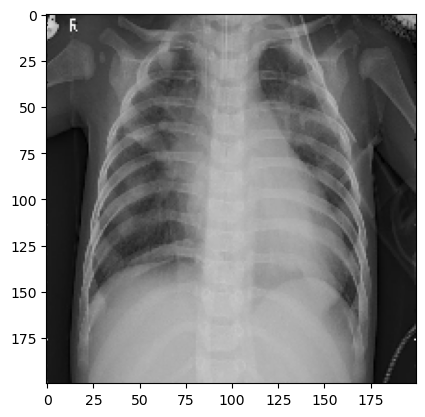

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
This patient has Pneumonia.


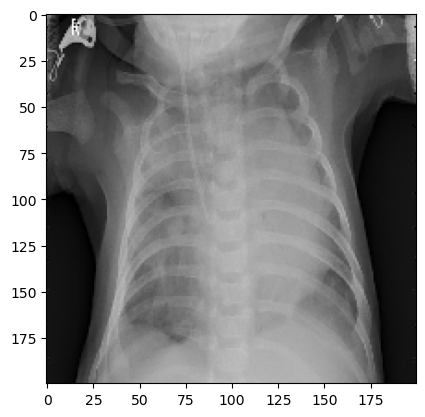

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
This patient has Pneumonia.


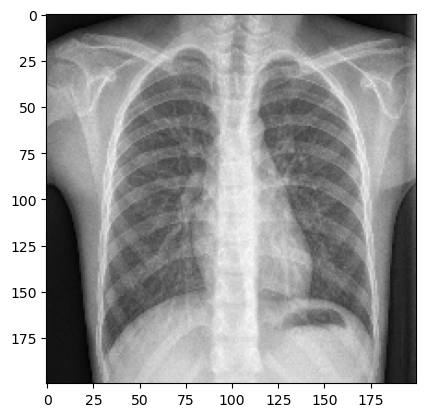

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
This patient has Pneumonia.


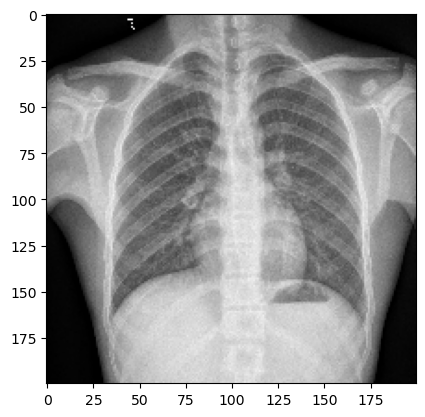

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
This patient has Pneumonia.


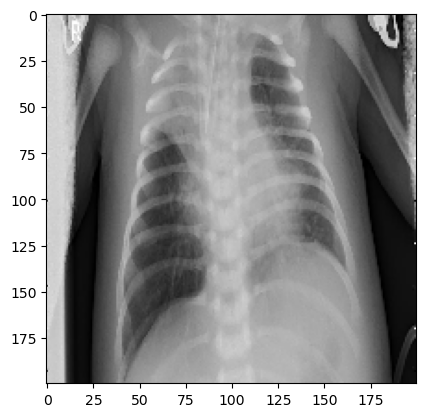

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
This patient has Pneumonia.


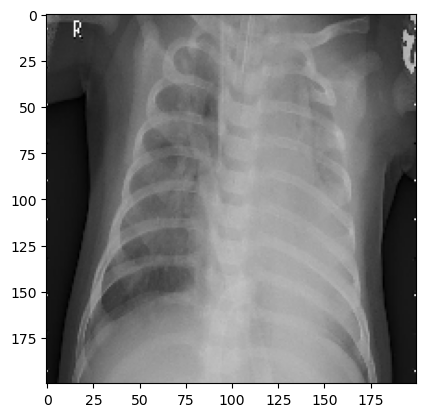

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
This patient has Pneumonia.


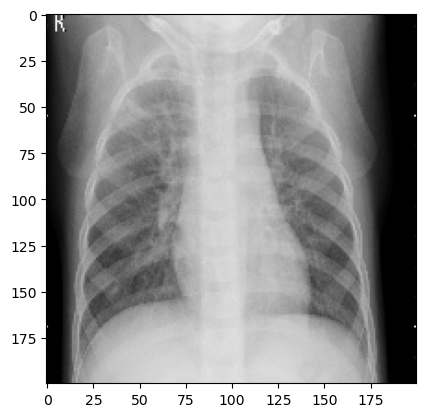

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
This patient has Pneumonia.


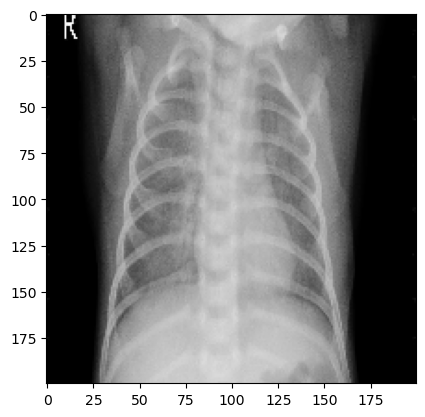

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
This patient has Pneumonia.


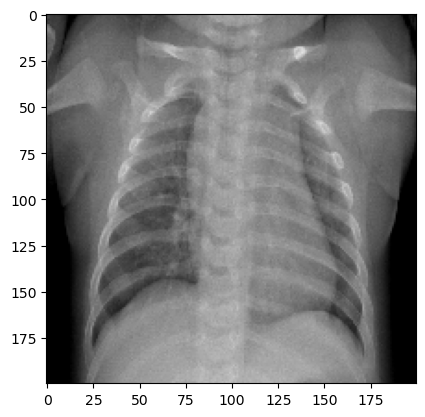

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
This patient has Pneumonia.


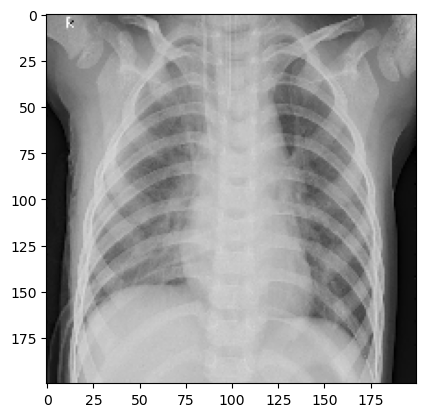

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
This patient has Pneumonia.


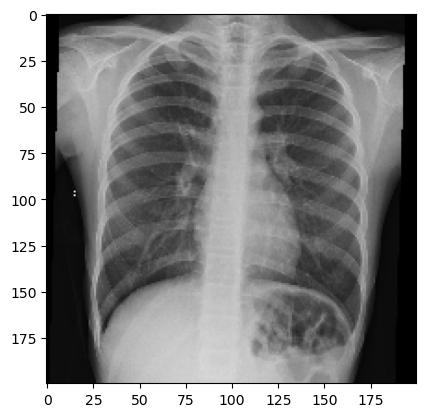

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
This patient has Pneumonia.


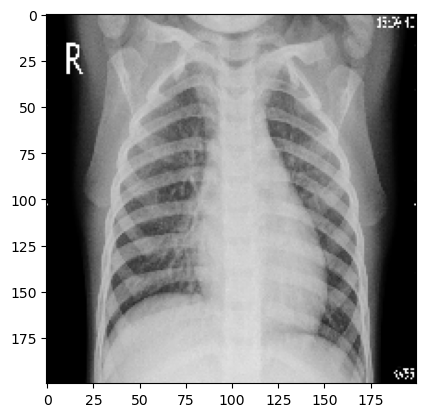

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
This patient has Pneumonia.


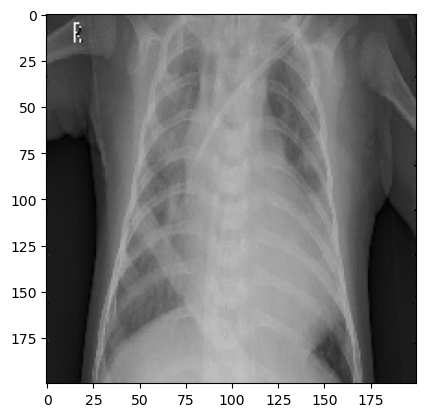

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
This patient has Pneumonia.


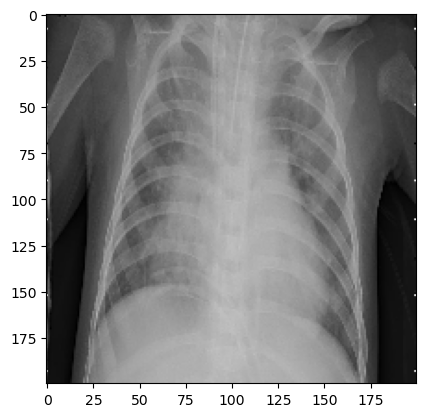

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
This patient has Pneumonia.


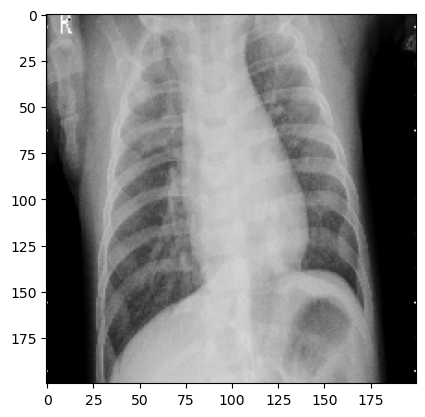

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
This patient has Pneumonia.


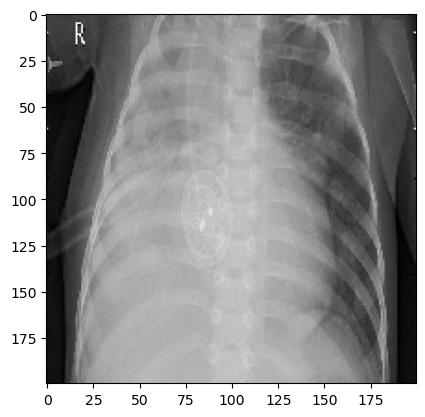

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
This patient has Pneumonia.


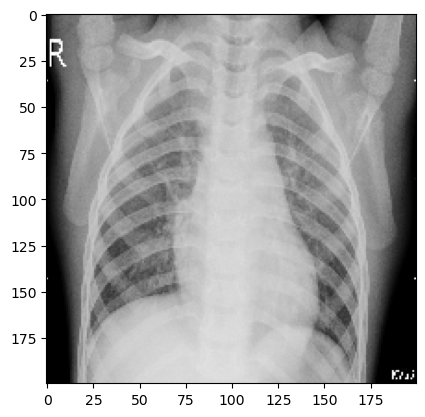

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
This patient has Pneumonia.


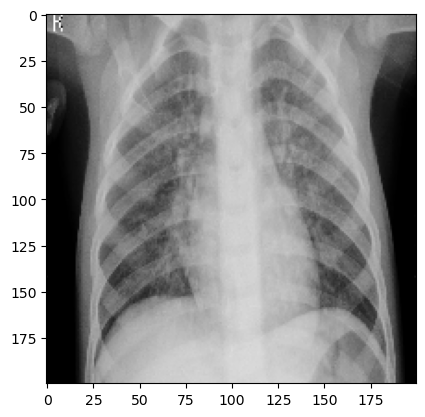

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
This patient has Pneumonia.


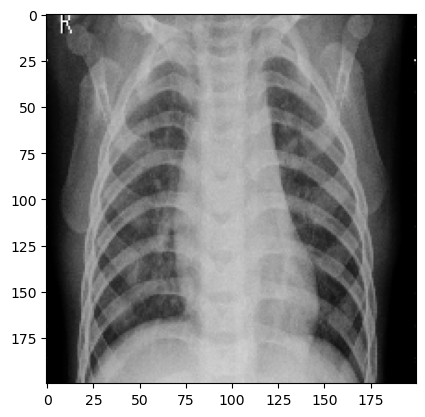

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
This patient has Pneumonia.


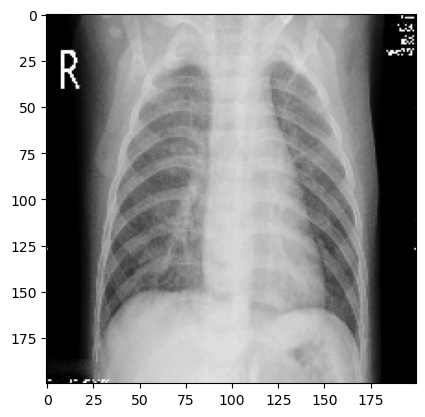

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
This patient has Pneumonia.


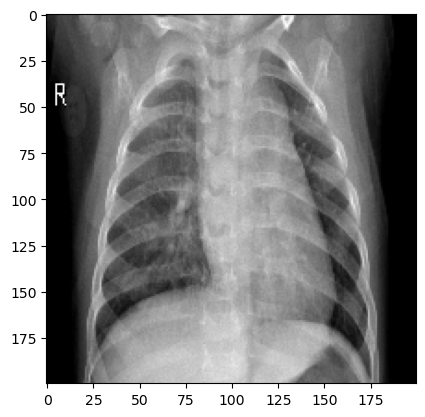

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
This patient has Pneumonia.


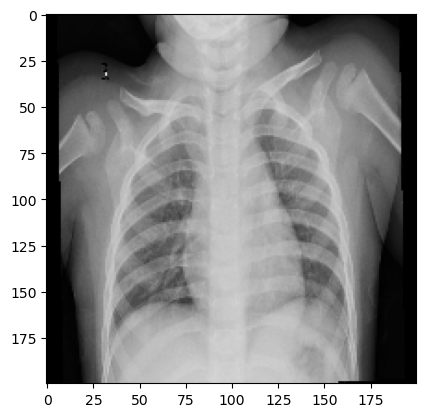

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
This patient has Pneumonia.


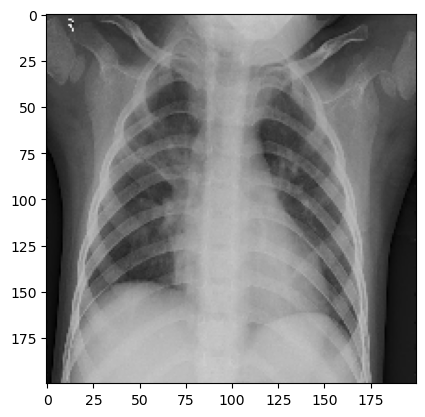

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
This patient has Pneumonia.


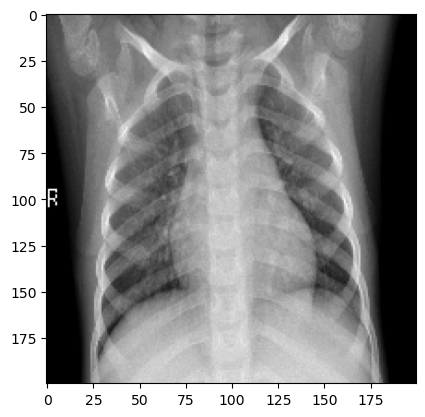

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
This patient has Pneumonia.


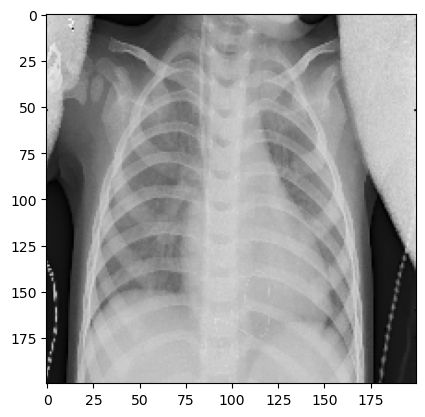

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
This patient has Pneumonia.


In [20]:
limit = 25
index = 0
test2_dir = base_dir + '/test2/'
# CLASSES = np.array(['Pneumonia', 'Normal'])

for i in os.listdir(test2_dir):
    img = image.load_img(test2_dir + i, target_size=(200,200))
    plt.imshow(img)
    plt.show()

    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    images = np.vstack([x])
    prediction = model.predict(images)
    if prediction == 0: 
        print("This patient does not have Pneumonia.")
    else:
        print("This patient has Pneumonia.")

    index += 1
    if index == limit:
        break
